# Describe data used in model training (HETDEX)

In [59]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import mpl_scatter_density
from sklearn.model_selection import train_test_split
from astropy.visualization import LogStretch, PowerStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import colorcet as cc
import cmasher as cmr
import pandas as pd

In [60]:
mpl.rcdefaults()

Create class to normalize asymmetric colorscales  
(from [http://chris35wills.github.io/matplotlib_diverging_colorbar/](http://chris35wills.github.io/matplotlib_diverging_colorbar/)).

In [3]:
class MidpointNormalize(mcolors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [4]:
pe1            = [mpe.Stroke(linewidth=5.0, foreground='black'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]
pe2            = [mpe.Stroke(linewidth=3.0, foreground='white'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]

---

## Reading data

#### Random seed

In [5]:
seed = 42

#### File name

In [6]:
cat_path            = '../../Catalogs/'  # relative path to the same directory

In [7]:
save_plot_flag      = False

In [8]:
used_area           = 'HETDEX'  # can be 'S82', 'HETDEX', 'COSMOS'
if used_area == 'HETDEX':
    used_subset     = 'all'  # 'training', 'test', 'train_test', 'validation', 'unknown', 'all'

In [9]:
file_S82            = 'CatWISE2020_S82_VLASS_VLAS82_PS1_GALEX_TGSS_XMM_2MASS_MILLIQUAS_7_4d_ALLWISE_SDSS_DR16_5sigma_imp.h5'
file_HETDEX         = 'CatWISE2020_VLASS_LOFAR_PS1_GALEX_TGSS_XMM_2MASS_MILLIQUAS_7_4d_ALLWISE_LOLSS_SDSS_DR16_5sigma_imp.h5'
file_COSMOS         = 'CatWISE2020_COSMOS_MILLIQUAS_7_4d_COSMOSVLA3_PS1_GALEX_TGSS_VLASS_XMM_2MASS_ALLWISE_SDSS_DR16_5sigma_imp.h5'
file_S82_Ananna_17  = f'CatWISE2020_S82_VLASS_VLAS82_PS1_GALEX_TGSS_XMM_2MASS_MILLIQUAS_7_4d_ALLWISE_Ananna_17_zsp_5sigma_imp.h5'  # 204 objects

file_name_dict      = {'S82': file_S82, 'HETDEX': file_HETDEX, 'COSMOS': file_COSMOS}
file_name           = file_name_dict[used_area]

In [10]:
feats_2_disc_S82    = ['objID', 'RA_MILLI', 'DEC_MILLI', 'X_ray_detect', 'Total_flux_VLASS', 'Fint_VLAS82',\
                       'Stotal_TGSS', 'FEP', 'W1mag', 'W2mag', 'FUVmag', 'NUVmag']
feats_2_disc_HETDEX = ['objID', 'RA_MILLI', 'DEC_MILLI', 'X_ray_detect', 'Total_flux_VLASS', 'Sint_LOFAR',\
                       'Stotal_TGSS', 'FEP', 'TotalFlux_LoLSS', 'W1mag', 'W2mag', 'FUVmag', 'NUVmag']
feats_2_disc_COSMOS = ['objID', 'RA_MILLI', 'DEC_MILLI', 'X_ray_detect', 'Total_flux_VLASS', 'Stotal_TGSS',\
                       'FEP', 'Flux_COSMOSVLA3', 'W1mag', 'W2mag', 'FUVmag', 'NUVmag']

feats_2_disc        = {'S82': feats_2_disc_S82, 'HETDEX': feats_2_disc_HETDEX, 'COSMOS': feats_2_disc_COSMOS}
features_2_discard  = feats_2_disc[used_area]

In [11]:
full_catalog_df     = pd.read_hdf(cat_path + file_name, key='df').drop(columns=features_2_discard)

In [12]:
full_catalog_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729647 entries, 0 to 6729646
Data columns (total 91 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   RA_ICRS       6729647 non-null  float32
 1   DE_ICRS       6729647 non-null  float32
 2   Name          6729647 non-null  object 
 3   TYPE          6729647 non-null  object 
 4   Z             29331 non-null    float32
 5   zsp           81059 non-null    float32
 6   spCl          6729647 non-null  object 
 7   band_num      6729647 non-null  int64  
 8   radio_detect  6729647 non-null  bool   
 9   is_str        6729647 non-null  int64  
 10  is_AGN        6729647 non-null  int64  
 11  is_SDSS_gal   6729647 non-null  int64  
 12  is_gal        6729647 non-null  int64  
 13  W1mproPM      6729647 non-null  float32
 14  W2mproPM      6729647 non-null  float32
 15  gmag          6729647 non-null  float32
 16  rmag          6729647 non-null  float32
 17  imag          6729647 non-n

In [13]:
if used_area == 'HETDEX' and used_subset != 'unknown' and used_subset != 'all':
    full_catalog_df = full_catalog_df.loc[(full_catalog_df.loc[:, 'is_gal'] == 1) | (full_catalog_df.loc[:, 'is_AGN'] == 1)]
if used_area == 'HETDEX' and used_subset == 'unknown':
    full_catalog_df = full_catalog_df.loc[(full_catalog_df.loc[:, 'is_gal'] != 0) & (full_catalog_df.loc[:, 'is_AGN'] != 1)]

In [14]:
if used_area == 'HETDEX' and used_subset == 'all':
    full_catalog_df = full_catalog_df
elif used_area == 'HETDEX' and used_subset != 'unknown':
    train_test_df, validation_df     = train_test_split(full_catalog_df, test_size=0.2,\
                                       random_state=seed, stratify=full_catalog_df.loc[:, 'is_AGN'])
    train_df, test_df                = train_test_split(train_test_df, test_size=0.3,\
                                       random_state=seed, stratify=train_test_df.loc[:, 'is_AGN'])
    print('Shape of used data in HETDEX')
    print('(Confirmed galaxies and AGN)')
    print('-' * 50)
    print(f'Full Dataset size:                  {full_catalog_df.shape}')
    print(f'Data for Modeling (Train and Test): {train_test_df.shape}')
    print(f'Training data:                      {train_df.shape}')
    print(f'Testing data:                       {test_df.shape}')
    print(f'Unseen Data For Validation:         {validation_df.shape}')
    print('-' * 50)

In [15]:
if used_area == 'HETDEX':
    print(f'Using {used_subset} data from HETDEX')
    if used_subset != 'unknown' and used_subset != 'all':
        selected_dataset = {'training': train_df, 'test': test_df, 'train_test': train_test_df, 'validation': validation_df}
        full_catalog_df = selected_dataset[used_subset]

Using all data from HETDEX


In [16]:
full_catalog_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729647 entries, 0 to 6729646
Data columns (total 91 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   RA_ICRS       6729647 non-null  float32
 1   DE_ICRS       6729647 non-null  float32
 2   Name          6729647 non-null  object 
 3   TYPE          6729647 non-null  object 
 4   Z             29331 non-null    float32
 5   zsp           81059 non-null    float32
 6   spCl          6729647 non-null  object 
 7   band_num      6729647 non-null  int64  
 8   radio_detect  6729647 non-null  bool   
 9   is_str        6729647 non-null  int64  
 10  is_AGN        6729647 non-null  int64  
 11  is_SDSS_gal   6729647 non-null  int64  
 12  is_gal        6729647 non-null  int64  
 13  W1mproPM      6729647 non-null  float32
 14  W2mproPM      6729647 non-null  float32
 15  gmag          6729647 non-null  float32
 16  rmag          6729647 non-null  float32
 17  imag          6729647 non-n

---

## Description plots

In [17]:
bands_plot = ['gmag', 'rmag', 'imag', 'zmag', 'ymag', 'Jmag',
              'Hmag', 'Kmag', 'W1mproPM', 'W2mproPM', 'W3mag', 'W4mag']

In [18]:
mag_cols_lim = {'W1mproPM': 20.13, 'W2mproPM': 19.81, 'Sint_LOFAR': 17.52, 'Total_flux_VLASS': 15.21,\
                    'TotalFlux_LoLSS': 12.91, 'Stotal_TGSS': 11.18, 'Fint_VLAS82': 17.86,\
                    'Flux_COSMOSVLA3': 21.25, 'W1mag': 19.6, 'W2mag': 19.34, 'W3mag': 16.67,\
                    'W4mag': 14.62, 'gmag': 23.3, 'rmag': 23.2, 'imag': 23.1, 'zmag': 22.3,\
                    'ymag': 21.4, 'FUVmag': 20.0, 'NUVmag': 21.0, 'FEP': 57.9, 'Jmag': 17.45,\
                    'Hmag': 17.24, 'Kmag': 16.59}  # Proper (5-sigma) limits

for key in mag_cols_lim:
    mag_cols_lim[key] = np.float32(mag_cols_lim[key])

In [19]:
mag_cols_names   = {'W1mproPM': 'W1 (CW)', 'W2mproPM': 'W2 (CW)', 'Sint_LOFAR': 'LOFAR', 'Total_flux_VLASS': 'VLASS', 
                  'TotalFlux_LoLSS': 'LoLSS', 'Stotal_TGSS': 'TGSS', 'W1mag': 'W1 (AW)', 
                  'W2mag': 'W2 (AW)', 'W3mag': 'W3 (AW)', 'W4mag': 'W4 (AW)', 'gmag': 'g', 'rmag': 'r', 
                  'imag': 'i', 'zmag': 'z', 'ymag': 'y', 'FUVmag': 'FUV', 'NUVmag': 'NUV', 
                  'FEP': 'XMM', 'Jmag': 'J', 'Hmag': 'H', 'Kmag': 'K'}

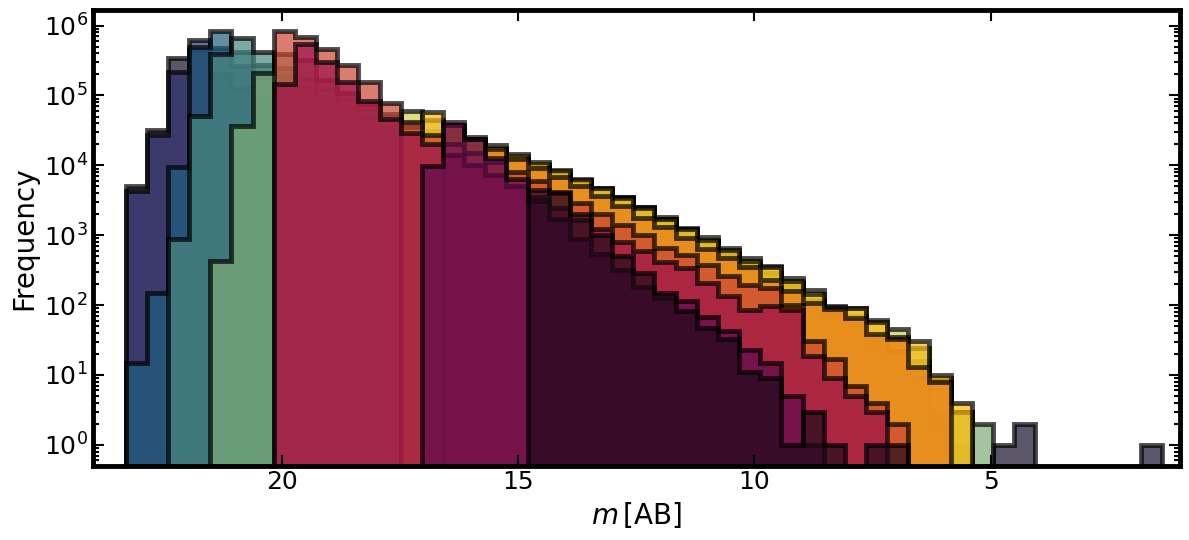

In [20]:
fig             = plt.figure(figsize=(12,5.5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')

min_magnitude   = full_catalog_df.loc[:, bands_plot].min().min()
max_magnitude   = full_catalog_df.loc[:, bands_plot].max().max()
mag_bins        = np.linspace(min_magnitude, max_magnitude, 50)

cmap_name       = 'cmr.pride'  # 'cmr.pride', 'cet_CET_R1'

for count, band in enumerate(bands_plot):
    filt_lims = np.array(full_catalog_df.loc[:, band] != mag_cols_lim[band])
    ax1.hist(full_catalog_df.loc[filt_lims, band], bins=mag_bins, histtype='stepfilled',\
             ec='k', lw=3.5, alpha=0.7, fc=plt.get_cmap(cmap_name, len(bands_plot))(count))
    
ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m\, \mathrm{[AB]}$', size=20)
ax1.set_ylabel('Frequency', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
# plt.legend(loc=1, fontsize=14)
ax1.set_xlim(left=np.floor(min_magnitude), right=np.ceil(max_magnitude))
ax1.invert_xaxis()
#ax1.set_aspect('equal', 'box')
fig.tight_layout()

/tmp/ipykernel_11737/3030647383.py:54: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


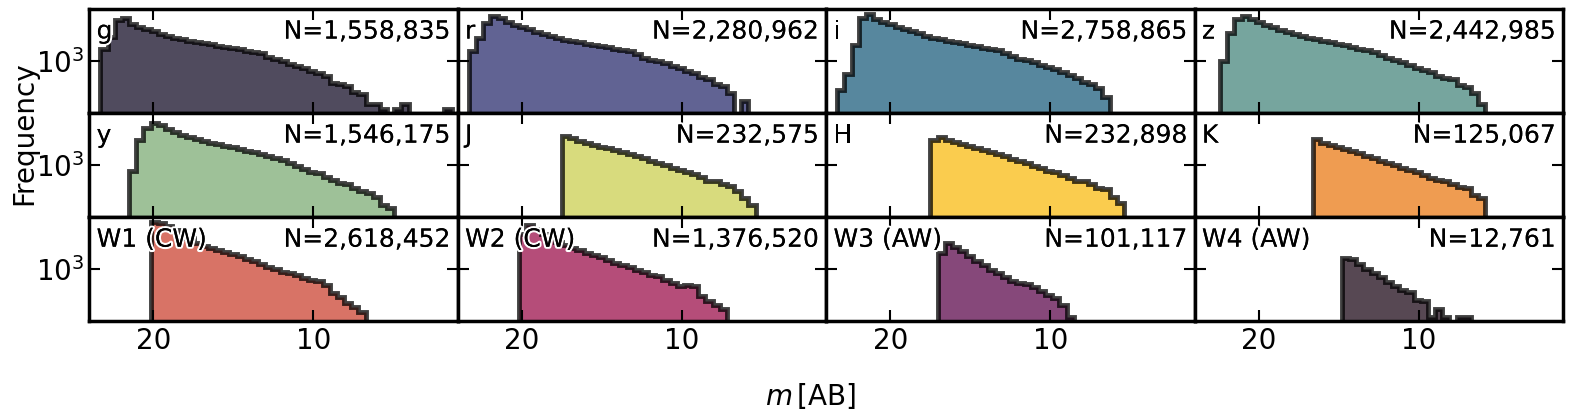

In [21]:
n_cols = 4
n_rows = int(np.ceil((len(bands_plot)) / 4))

min_magnitude  = full_catalog_df.loc[:, bands_plot].min().min()
max_magnitude  = full_catalog_df.loc[:, bands_plot].max().max()
mag_bins       = np.linspace(min_magnitude, max_magnitude, 50)

fig             = plt.figure(figsize=(4 * n_cols, 1.4 * n_rows), constrained_layout=True)

grid            = fig.add_gridspec(ncols=n_cols, nrows=n_rows, width_ratios=[1]*n_cols,
                                   height_ratios=[1]*n_rows, hspace=0.0, wspace=0.0)
axs             = {}
norm_z          = mcolors.Normalize(vmin=0, vmax=8)
cmap_name       = 'cmr.pride'  # 'cmr.pride', 'cet_CET_R1'

for count, band in enumerate(bands_plot):
    if count == 0:
        axs[count] = fig.add_subplot(grid[int(np.floor(count / n_cols)), int(count % n_cols)],
                                     xscale='linear', yscale='log')
    elif count != 0:
        axs[count] = fig.add_subplot(grid[int(np.floor(count / n_cols)), int(count % n_cols)],
                                     sharex=axs[0], sharey=axs[0])
    
    filt_lims = np.array(full_catalog_df.loc[:, band] != mag_cols_lim[band])
    axs[count].hist(full_catalog_df.loc[filt_lims, band], bins=mag_bins, histtype='stepfilled',
                    ec='k', lw=3.5, fc=plt.get_cmap(cmap_name, len(bands_plot))(count),
                    alpha=0.75, label=f'{band}')
    
    axs[count].tick_params(which='both', top=True, right=True, direction='in')
    axs[count].tick_params(axis='both', which='major', labelsize=20)
    axs[count].tick_params(which='major', length=8, width=1.5)
    axs[count].tick_params(which='minor', length=4, width=1.5)
    plt.setp(axs[count].spines.values(), linewidth=2.5)
    plt.setp(axs[count].spines.values(), linewidth=2.5)
    #axs[count].grid(zorder=0)
    if count % n_cols != 0:
        plt.setp(axs[count].get_yticklabels(), visible=False)
    # if np.ceil((count + 1) / n_cols) != n_rows:
    #     plt.setp(axs[count].get_xticklabels(), visible=False)
    if count < (len(bands_plot) - n_cols):
        plt.setp(axs[count].get_xticklabels(), visible=False)
    axs[count].annotate(text=f'{mag_cols_names[band]}', xy=(0.02, 0.9),\
                         xycoords='axes fraction', fontsize=18, ha='left', va='top', path_effects=pe2)
    axs[count].annotate(text=f'N={np.sum(filt_lims):,}', xy=(0.98, 0.9),\
                         xycoords='axes fraction', fontsize=18, ha='right', va='top', path_effects=pe2)
    axs[0].set_xlim(left=np.floor(min_magnitude), right=np.ceil(max_magnitude))
    axs[0].invert_xaxis()
    # axs[count].legend(loc=2)


fig.supxlabel('$m\, \mathrm{[AB]}$', fontsize=20, x=0.52)
fig.supylabel('Frequency', fontsize=20, va='bottom')

fig.tight_layout()
if save_plot_flag:
    plt.savefig(f'plots/hists_bands_{used_area}.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_11737/895044688.py:63: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


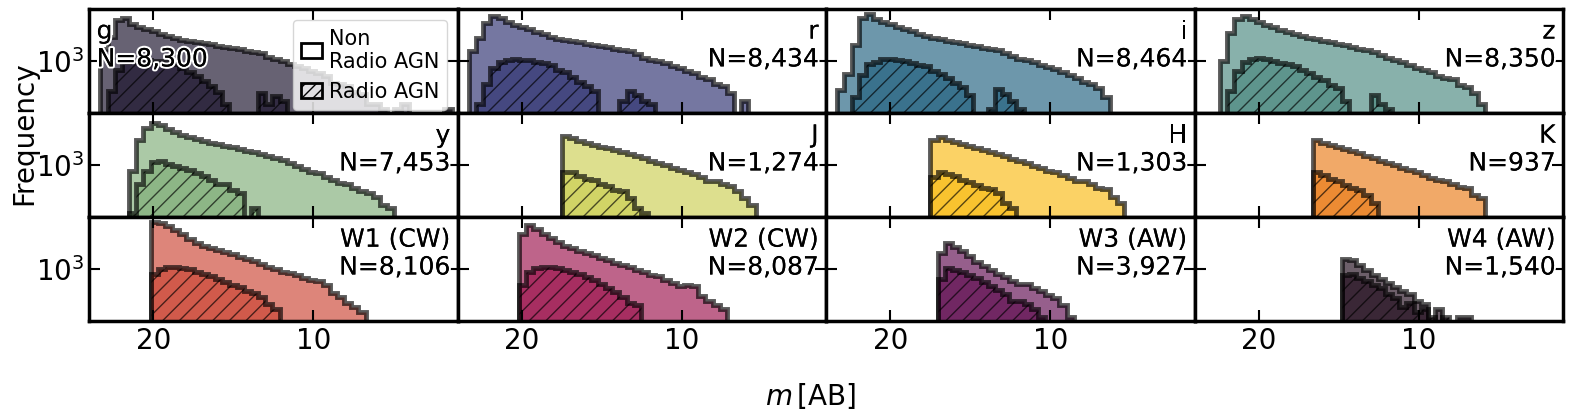

In [22]:
n_cols = 4
n_rows = int(np.ceil((len(bands_plot)) / 4))

min_magnitude  = full_catalog_df.loc[:, bands_plot].min().min()
max_magnitude  = full_catalog_df.loc[:, bands_plot].max().max()
mag_bins       = np.linspace(min_magnitude, max_magnitude, 50)

fig             = plt.figure(figsize=(4 * n_cols, 1.4 * n_rows), constrained_layout=True)

grid            = fig.add_gridspec(ncols=n_cols, nrows=n_rows, width_ratios=[1]*n_cols,
                                   height_ratios=[1]*n_rows, hspace=0.0, wspace=0.0)
axs             = {}
norm_z          = mcolors.Normalize(vmin=0, vmax=8)
cmap_name       = 'cmr.pride'  # 'cmr.pride', 'cet_CET_R1'

for count, band in enumerate(bands_plot):
    if count == 0:
        axs[count] = fig.add_subplot(grid[int(np.floor(count / n_cols)), int(count % n_cols)],
                                     xscale='linear', yscale='log')
    elif count != 0:
        axs[count] = fig.add_subplot(grid[int(np.floor(count / n_cols)), int(count % n_cols)],
                                     sharex=axs[0], sharey=axs[0])
    # used_cols  = unique_cols_imp.index[count:]
    # print(used_cols)
    # print(new_band)
    
    filt_lims      = np.array(full_catalog_df.loc[:, band] != mag_cols_lim[band])
    filt_radio_agn = np.array(full_catalog_df.loc[:, 'radio_detect'] == 1) & np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)
    axs[count].hist(full_catalog_df.loc[filt_lims & ~filt_radio_agn, band], bins=mag_bins, histtype='stepfilled',
                    ec='k', lw=3.5, fc=plt.get_cmap(cmap_name, len(bands_plot))(count),
                    alpha=0.65, label=f'{band}')
    axs[count].hist(full_catalog_df.loc[filt_lims & filt_radio_agn, band], bins=mag_bins, histtype='stepfilled',
                    ec='k', lw=3.5, fc=plt.get_cmap(cmap_name, len(bands_plot))(count),
                    alpha=0.65, label=f'{band}', hatch='//')
    axs[count].tick_params(which='both', top=True, right=True, direction='in')
    axs[count].tick_params(axis='both', which='major', labelsize=20)
    axs[count].tick_params(which='major', length=8, width=1.5)
    axs[count].tick_params(which='minor', length=4, width=1.5)
    plt.setp(axs[count].spines.values(), linewidth=2.5)
    plt.setp(axs[count].spines.values(), linewidth=2.5)
    #axs[count].grid(zorder=0)
    if count % n_cols != 0:
        plt.setp(axs[count].get_yticklabels(), visible=False)
    if count < (len(bands_plot) - n_cols):
        plt.setp(axs[count].get_xticklabels(), visible=False)
    if count == 0:
        axs[count].annotate(text=f'{mag_cols_names[band]}\nN={np.sum(filt_lims & filt_radio_agn):,}', xy=(0.02, 0.9),\
                             xycoords='axes fraction', fontsize=18, ha='left', va='top', path_effects=pe2)
    if count != 0:
        axs[count].annotate(text=f'{mag_cols_names[band]}\nN={np.sum(filt_lims & filt_radio_agn):,}', xy=(0.98, 0.9),\
                             xycoords='axes fraction', fontsize=18, ha='right', va='top', path_effects=pe2)
axs[0].set_xlim(left=np.floor(min_magnitude), right=np.ceil(max_magnitude))
axs[0].invert_xaxis()

radio_AGN_patch     = mpatches.Patch(fc='None', ec='k', label='Non\nRadio AGN', lw=2.0)
non_radio_AGN_patch = mpatches.Patch(fc='None', ec='k', label='Radio AGN', hatch='///', lw=2.0)
axs[0].legend(handles=[radio_AGN_patch, non_radio_AGN_patch], loc=1, fontsize=15,
              handletextpad=0.3, handlelength=1.0)

fig.supxlabel('$m\, \mathrm{[AB]}$', fontsize=20, x=0.52)
fig.supylabel('Frequency', fontsize=20, va='bottom')

fig.tight_layout()
if save_plot_flag:
    plt.savefig(f'plots/hists_bands_radio_AGN_{used_area}.pdf', bbox_inches='tight')
plt.show()

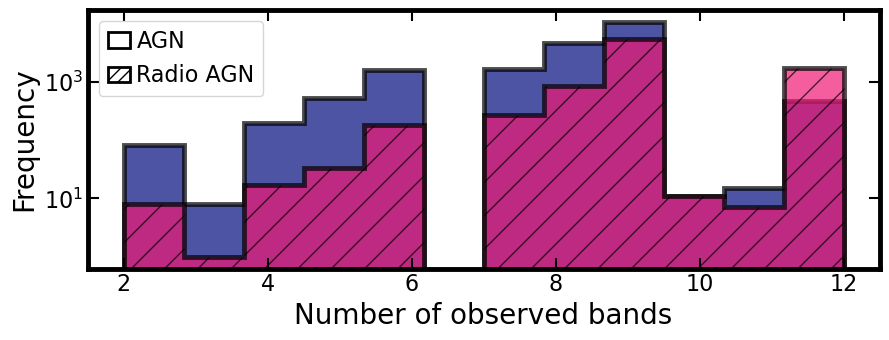

In [23]:
fig             = plt.figure(figsize=(9,3.5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')

filt_AGN        = np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)
filt_nrad_AGN   = np.array(full_catalog_df.loc[:, 'radio_detect'] == 0) & np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)
filt_radio_AGN  = np.array(full_catalog_df.loc[:, 'radio_detect'] == 1) & np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)

min_num_band   = full_catalog_df.loc[:, 'band_num'].min()
max_num_band   = full_catalog_df.loc[:, 'band_num'].max()
band_bins      = np.linspace(min_num_band, max_num_band, 13)

_, bins, _ = ax1.hist(full_catalog_df.loc[filt_nrad_AGN, 'band_num'], bins=band_bins, histtype='stepfilled', ec='k',
                      fc=plt.get_cmap('cet_bmy',3)(0.0), lw=3.5, label='Non radio AGN', alpha=0.7, density=False)
ax1.hist(full_catalog_df.loc[filt_radio_AGN, 'band_num'], bins=band_bins, histtype='stepfilled', ec='k',
         fc=plt.get_cmap('cet_bmy',3)(0.5), lw=3.5, label='Radio AGN', alpha=0.7, density=False, hatch='/')

AGN_patch       = mpatches.Patch(fc='None', ec='k', label='AGN', lw=2.0)
radio_AGN_patch = mpatches.Patch(fc='None', ec='k', label='Radio AGN', hatch='///', lw=2.0)
ax1.legend(handles=[AGN_patch, radio_AGN_patch], loc=2, fontsize=16,
              handletextpad=0.3, handlelength=1.0)

ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('Number of observed bands', size=20)
ax1.set_ylabel('Frequency', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
#ax1.set_aspect('equal', 'box')
fig.tight_layout()
if save_plot_flag:
    plt.savefig(f'plots/hist_nbands_rAGN_non_rAGN_{used_area}.pdf', bbox_inches='tight')
plt.show()

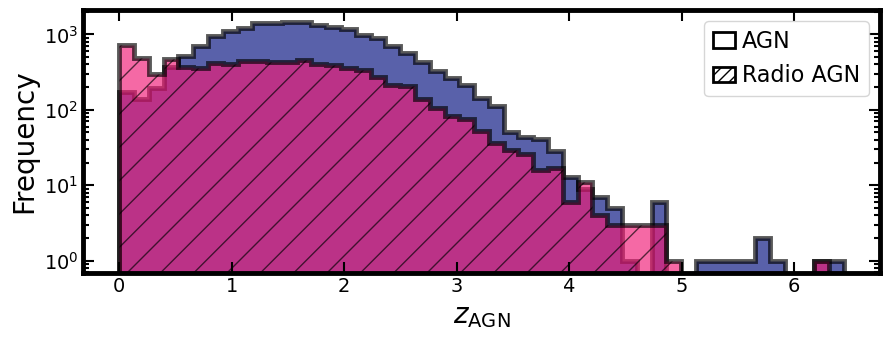

In [24]:
fig             = plt.figure(figsize=(9,3.5))
ax1             = fig.add_subplot(111, xscale='linear', yscale='log')


filt_AGN        = np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)
filt_nrad_AGN   = np.array(full_catalog_df.loc[:, 'radio_detect'] == 0) & np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)
filt_radio_AGN  = np.array(full_catalog_df.loc[:, 'radio_detect'] == 1) & np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)

min_z           = full_catalog_df.loc[:, 'Z'].min()
max_z           = full_catalog_df.loc[:, 'Z'].max()
z_bins          = np.linspace(min_z, max_z, 50)

_, bins, _ = ax1.hist(full_catalog_df.loc[filt_nrad_AGN, 'Z'], bins=z_bins, histtype='stepfilled', ec='k',
                      fc=plt.get_cmap('cet_bmy',3)(0.0), lw=3.5, label='AGN', alpha=0.65, density=False)
ax1.hist(full_catalog_df.loc[filt_radio_AGN, 'Z'], bins=z_bins, histtype='stepfilled', ec='k',
         fc=plt.get_cmap('cet_bmy',3)(0.5), lw=3.5, label='Radio AGN', alpha=0.65, density=False, hatch='/')

AGN_patch       = mpatches.Patch(fc='None', ec='k', label='AGN', lw=2.0)
radio_AGN_patch = mpatches.Patch(fc='None', ec='k', label='Radio AGN', hatch='///', lw=2.0)
ax1.legend(handles=[AGN_patch, radio_AGN_patch], loc=1, fontsize=16,
              handletextpad=0.3, handlelength=1.0)

ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
# ax1.set_xlabel('$m_{\mathrm{W1}}\, \mathrm{[AB]}$', size=20)
ax1.set_xlabel('$z_{\mathrm{AGN}}$', size=20)
# ax1.set_ylabel('Normalised\nFrequency', size=20)
ax1.set_ylabel('Frequency', size=20)
# ax1.set_ylabel('Frequency', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
# plt.legend(loc=1, fontsize=14)
# ax1.set_xlim(left=2.8, right=20.2)
#ax1.set_aspect('equal', 'box')
fig.tight_layout()
if save_plot_flag:
    plt.savefig(f'plots/hist_z_radio_non_radio_AGN_{used_area}.pdf', bbox_inches='tight')
plt.show()

/home/rcarvajal/.miniforge3/envs/test_pycaret/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/rcarvajal/.miniforge3/envs/test_pycaret/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


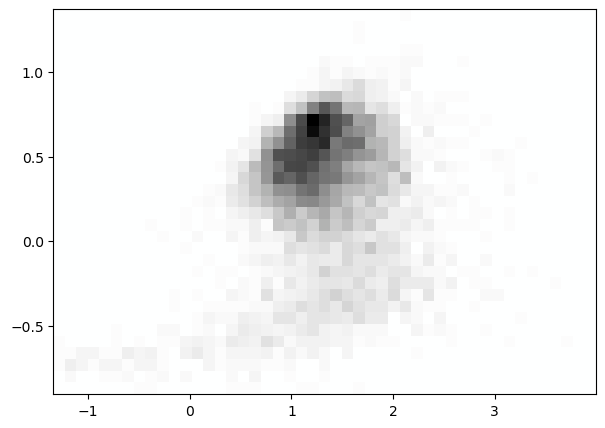

In [25]:
fig_temp             = plt.figure(figsize=(7,5))
ax1_temp             = fig_temp.add_subplot(111, xscale='linear', yscale='linear',  projection='scatter_density')

filt_plot_a = np.array(full_catalog_df.loc[:, 'W1mproPM'] != mag_cols_lim['W1mproPM']) &\
              np.array(full_catalog_df.loc[:, 'W2mproPM'] != mag_cols_lim['W2mproPM']) &\
              np.array(full_catalog_df.loc[:, 'W3mag']    != mag_cols_lim['W3mag'])
filt_agn_a  = np.array(full_catalog_df.loc[:, 'is_AGN'] == 1)

if np.sum(filt_agn_a & filt_plot_a) > 0:
    dens_agn_a  = ax1_temp.scatter_density((full_catalog_df.loc[filt_agn_a & filt_plot_a, 'W2mproPM'] -\
                                        full_catalog_df.loc[filt_agn_a & filt_plot_a, 'W3mag']),\
                                       (full_catalog_df.loc[filt_agn_a & filt_plot_a, 'W1mproPM'] -\
                                        full_catalog_df.loc[filt_agn_a & filt_plot_a, 'W2mproPM']),\
                                       cmap=plt.get_cmap('cet_gray_r'), zorder=0, dpi=10, alpha=1.0)

In [51]:
num_contour_levels = 10
type_of_levels     = 'log'  # 'log', 'linear'

In [52]:
print('For the following plot, contour levels will be located at:')
if type_of_levels  == 'linear':
    print(np.ceil(np.linspace(0.5, 10**(np.log10(np.nanmax(dens_agn_a.get_array()))), num_contour_levels)))
if type_of_levels  == 'log':
    print(np.ceil(np.logspace(np.log10(0.5), np.log10(np.nanmax(dens_agn_a.get_array())), num_contour_levels)))

For the following plot, contour levels will be located at:
[  1.   1.   2.   3.   6.  10.  18.  31.  56. 100.]


In [74]:
dens_clb_in = True  # Plot colorbar for density outside of inside axes.

/tmp/ipykernel_11737/3245000550.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


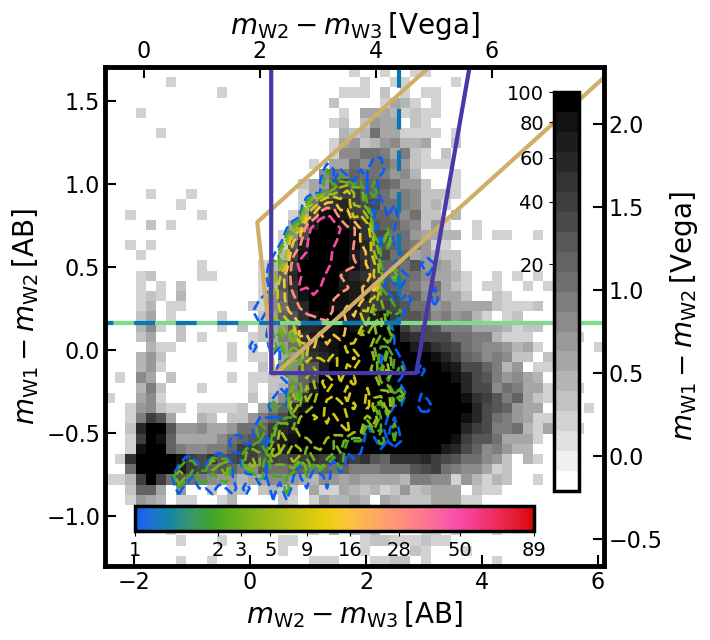

In [83]:
if not dens_clb_in:
    fig                = plt.figure(figsize=(9,6.5))
if dens_clb_in:
    fig                = plt.figure(figsize=(7.2,6.5))
ax1                = fig.add_subplot(111, xscale='linear', yscale='linear', projection='scatter_density')

num_levels_dens    = 20
cmap_dens          = 'cet_gray_r'
cmap_cont          = 'cet_CET_R3'
cmap_agn           = 'cet_CET_C9'

if np.sum(filt_agn_a & filt_plot_a) > 0:
    if type_of_levels  == 'linear':
        contour_levels = np.linspace(0.5,\
                                     10**(np.log10(np.nanmax(dens_agn_a.get_array()))),\
                                     num_contour_levels)
    if type_of_levels  == 'log':
        contour_levels = np.logspace(np.log10(0.5),\
                                 np.log10(np.nanmax(dens_agn_a.get_array())),\
                                 num_contour_levels)
    contour_levels = np.unique(np.ceil(contour_levels))

AB_lims_x          = (-2.5, 6.1)
AB_lims_y          = (-1.3, 1.7)

norm_dens          = ImageNormalize(vmin=0.1, vmax=100, stretch=PowerStretch(0.35))
if np.sum(filt_agn_a & filt_plot_a) > 0:
    norm_cont          = ImageNormalize(vmin=contour_levels[0], vmax=contour_levels[-1], stretch=PowerStretch(0.35))

filt_bands         = np.array(full_catalog_df.loc[:, 'W1mproPM']  != mag_cols_lim['W1mproPM']) &\
                     np.array(full_catalog_df.loc[:, 'W2mproPM']  != mag_cols_lim['W2mproPM']) &\
                     np.array(full_catalog_df.loc[:, 'W3mag']     != mag_cols_lim['W3mag'])

filt_plot          = np.isfinite(full_catalog_df.loc[:, 'W2mproPM'] - full_catalog_df.loc[:, 'W3mag']) &\
                     np.isfinite(full_catalog_df.loc[:, 'W1mproPM'] - full_catalog_df.loc[:, 'W2mproPM'])

dens_plot_data_x = (full_catalog_df.loc[filt_bands, 'W2mproPM'] -\
                    full_catalog_df.loc[filt_bands, 'W3mag'])[filt_plot]
dens_plot_data_y = (full_catalog_df.loc[filt_bands, 'W1mproPM'] -\
                    full_catalog_df.loc[filt_bands, 'W2mproPM'])[filt_plot]

dens_1 = ax1.scatter_density(dens_plot_data_x, dens_plot_data_y,
                             cmap=plt.get_cmap(cmap_dens, num_levels_dens),
                             zorder=0, dpi=10, norm=norm_dens, alpha=1.0)

if np.sum(filt_agn_a & filt_plot_a) > 0:
    xx_agn = np.linspace(dens_agn_a.get_extent()[0], dens_agn_a.get_extent()[1], np.shape(dens_agn_a.get_array())[1])
    yy_agn = np.linspace(dens_agn_a.get_extent()[2], dens_agn_a.get_extent()[3], np.shape(dens_agn_a.get_array())[0])

    cont_1 = ax1.contour(xx_agn, yy_agn, np.flipud(dens_agn_a.get_array()), levels=contour_levels,\
                         linewidths=1.9, cmap=plt.get_cmap(cmap_cont), linestyles='--', zorder=1, norm=norm_cont)

x_Vega   = np.array(AB_lims_x) - 3.339 + 5.174  # Vega
y_Vega   = np.array(AB_lims_y) - 2.699 + 3.339  # Vega
# Mateos+2012
y_M12_a = 0.315 * (x_Vega) + 0.791
y_M12_b = 0.315 * (x_Vega) - 0.222
y_M12_c = -3.172 * (x_Vega) + 7.624
# Stern+2012
# Toba+2014
# Mingo+2016
# # Assef+2018 (75% completeness)
# y_A18_75 = 0.530 * np.exp(0.183 * (full_catalog_df.loc[filt_plot, 'W2mproPM'] - 3.339 - 13.76)**2)
# # Assef+2018 (90% completeness)
# y_A18_90 = 0.662 * np.exp(0.232 * (full_catalog_df.loc[filt_plot, 'W2mproPM'] - 3.339 - 13.97)**2)
# Blecha+2018
points_M12 = np.array([[x_Vega[-1], 1.9596, 2.2501, x_Vega[-1]], [y_M12_a[-1], 1.4083, 0.4867, y_M12_b[-1]]])
points_M16 = np.array([[4.4, 4.4, x_Vega[0], x_Vega[0]], [y_Vega[-1], 0.8, 0.8, y_Vega[-1]]])
points_B18 = np.array([[2.2, 2.2, 4.7, (y_Vega[-1] + 8.9) * 0.5], [y_Vega[-1], 0.5, 0.5, y_Vega[-1]]])

ax1.plot(points_M12[0] + 3.339 - 5.174, points_M12[1] + 2.699 - 3.339, label='M12',\
         c=plt.get_cmap(cmap_agn)(0.1), zorder=2, lw=3)
ax1.axhline(y=0.8 + 2.699 - 3.339, label='S12', c=plt.get_cmap(cmap_agn)(0.35), zorder=2, lw=3)
ax1.plot(points_M16[0] + 3.339 - 5.174, points_M16[1] + 2.699 - 3.339, label='M16',\
         c=plt.get_cmap(cmap_agn)(0.6), zorder=2, lw=3, ls=(0, (5, 5)))
ax1.plot(points_B18[0] + 3.339 - 5.174, points_B18[1] + 2.699 - 3.339, label='B18',\
         c=plt.get_cmap(cmap_agn)(0.75), zorder=2, lw=3)

ax1.plot([-3], [-3], marker='s', ls='None', c=plt.get_cmap(cmap_dens)(1.1), label='CW', zorder=0)
if np.sum(filt_agn_a & filt_plot_a) > 0:
    ax1.plot([-3], [-3], marker=None, ls='--', c=plt.get_cmap(cmap_cont)(0.0), label='MQC', zorder=0)

if not dens_clb_in:
    clb = plt.colorbar(dens_1, extend='neither', pad=0.15)
    clb.formatter.set_powerlimits((0, 0))
    clb.ax.tick_params(labelsize=14)
    clb.ax.yaxis.get_offset_text().set_fontsize(14)
    # clb.ax.yaxis.set_offset_position('right')
    clb.ax.yaxis.get_offset_text().set_position((0,0))
    clb.outline.set_linewidth(2.5)
    clb.update_ticks()
    clb.ax.set_ylabel('Elements per pixel', size=16, path_effects=pe2, labelpad=-2)
    ax1.set_xlim(left=AB_lims_x[0], right=AB_lims_x[1])
    ax1.set_ylim(bottom=AB_lims_y[0], top=AB_lims_y[1])
    ax1.legend(loc=2, fontsize=14, ncol=3, columnspacing=.5, handletextpad=0.2, handlelength=0.8)

# vega_shift     = {'W1mproPM': 2.699, 'W2mproPM': 3.339, 'W1mag': 2.699, 'W2mag': 3.339, 'W3mag': 5.174,\
#                   'W4mag': 6.620, 'Jmag': 0.910, 'Hmag': 1.390, 'Kmag': 1.850, 'gmag': 0.4810,\
#                     'rmag': 0.6170, 'imag': 0.7520, 'zmag': 0.8660, 'ymag': 0.9620}

# Colorbar density
if dens_clb_in:
    axins0 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                        loc=1, bbox_to_anchor=(0.9, 0.15, 0.05, 0.80), borderpad=0)
    
    clb_dens    = fig.colorbar(dens_1, cax=axins0, orientation='vertical',\
                     cmap=plt.get_cmap(cmap_dens, num_levels_dens), norm=norm_dens)
    axins0.yaxis.set_ticks_position('left')
    clb_dens.ax.tick_params(labelsize=14)
    clb_dens.outline.set_linewidth(2.5)
    # clb_dens.ax.set_ylabel('Elements per pixel', size=12, path_effects=pe2)
##

# Colorbar contour
axins1 = inset_axes(ax1, width='100%', height='100%', bbox_transform=ax1.transAxes,\
                    loc=3, bbox_to_anchor=(0.06, 0.07, 0.80, 0.05), borderpad=0)
sm = plt.cm.ScalarMappable(norm=norm_cont, cmap=cont_1.cmap)
sm.set_array([])
clb_cont    = fig.colorbar(sm, cax=axins1, orientation='horizontal', ticks=cont_1.levels)
axins1.xaxis.set_ticks_position('bottom')
clb_cont.ax.tick_params(labelsize=14)
clb_cont.outline.set_linewidth(2.5)
##

ax1.set_xlim(AB_lims_x)
ax1.set_ylim(AB_lims_y)

ax2 = ax1.twinx()
ax2.set_ylim(tuple(np.array(ax1.get_ylim()) - 2.699 + 3.339))
ax2.tick_params(which='both', top=False, right=True, direction='in')
ax2.tick_params(which='both', bottom=False, left=False, direction='in')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(which='major', length=8, width=1.5)
ax2.tick_params(which='minor', length=4, width=1.5)
ax2.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[Vega]}$', size=20)

ax3 = ax1.twiny()
ax3.set_xlim(tuple(np.array(ax1.get_xlim()) - 3.339 + 5.174))
ax3.tick_params(which='both', top=True, right=False, direction='in')
ax3.tick_params(which='both', bottom=False, left=False, direction='in')
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(which='major', length=8, width=1.5)
ax3.tick_params(which='minor', length=4, width=1.5)
ax3.set_xlabel('$m_{\mathrm{W2}} - m_{\mathrm{W3}}\, \mathrm{[Vega]}$', size=20)

ax1.tick_params(which='both', top=False, right=False, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
ax1.set_xlabel('$m_{\mathrm{W2}} - m_{\mathrm{W3}}\, \mathrm{[AB]}$', size=20)
ax1.set_ylabel('$m_{\mathrm{W1}} - m_{\mathrm{W2}}\, \mathrm{[AB]}$', size=20)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.setp(ax1.spines.values(), linewidth=3.5)
plt.tight_layout()
if save_plot_flag:
    plt.savefig(f'plots/W1_W2_W3_AGN_{used_area}.pdf', bbox_inches='tight')
plt.show()